# **Exercise 5, Advanced Deep Learning**

Eetu Karttunen

Implementation of image data augmentation:
1. Construct your own convolutional neural network, train the network with CIFAR10 dataset, then
test the classification result of the implementation of horizontal and vertical flip augmentation
technique on “dog.jpg” image.
CIFAR10 database link: https://www.cs.toronto.edu/~kriz/cifar.html

2. Construct your own convolutional neural network, train the network with MNIST dataset, then test
the classification result of the implementation of rotation augmentation technique on
“handwritten6.jpg” image.
MNIST database link: http://yann.lecun.com/exdb/mnist/

The code is splitted into two parts to answer both tasks.

# CNN with CIFAR 10 (horizontal and vertical flip augmentation)

Mounted at /content/gdrive
170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 25s 8ms/step - loss: 1.5513 - accuracy: 0.4340 - val_loss: 1.3124 - val_accuracy: 0.5339
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1592 - accuracy: 0.5870 - val_loss: 1.0845 - val_accuracy: 0.6107
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0151 - accuracy: 0.6416 - val_loss: 1.0141 - val_accuracy: 0.6456
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9174 - accuracy: 0.6766 - val_loss: 0.9320 - val_accuracy: 0.6727
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8475 - accuracy: 0.7025 - val_loss: 0.9133 - val_accuracy: 0.6831
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7889 - accuracy: 0.7247 - val_loss: 0.8897 - val_accuracy: 0.6912
Epoch 7/10
1563/1563 [================

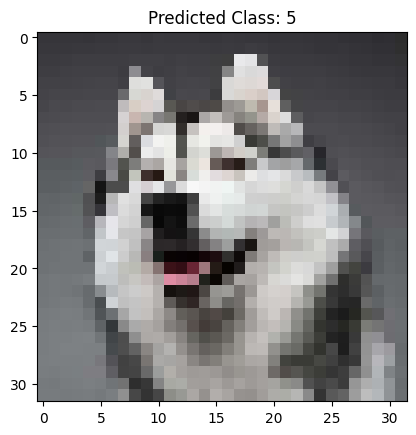

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

# Loading CIFAR10
cifar10 = tf.keras.datasets.cifar10
(trainImages, trainLabels), (testImages, testLabels) = cifar10.load_data()

# Normalizing pixel values between 0 and 1
trainImages, testImages = trainImages / 255.0, testImages / 255.0

# Defining the CNN
cnnModel = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compiling
cnnModel.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

# Training
cnnModel.fit(trainImages, trainLabels, epochs=10, validation_data=(testImages, testLabels))

# Loading picture and doing the preprocessing
dogImagePath = "/content/gdrive/MyDrive/Colab Notebooks/dog.jpg"
dogImg = image.load_img(dogImagePath, target_size=(32, 32))
dogImgArray = image.img_to_array(dogImg)
dogImgArray = tf.expand_dims(dogImgArray, 0)
dogImgArray /= 255.0

# Augmenting the image to horizontal and verfical flip.
dataGenerator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
augmentedDogImg = dataGenerator.flow(dogImgArray)

# Predicting the class of the image.
predictions = cnnModel.predict(augmentedDogImg)
predictedClass = tf.argmax(predictions[0]).numpy()

# Displaying the results.
plt.imshow(dogImg)
plt.title(f"Predicted Class: {predictedClass}")
plt.show()


# CNN with MNIST (rotation augmentation technique)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2919 - accuracy: 0.9157
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1434 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1066 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0886 - accuracy: 0.9729
Epoch 5/5
1/1 [==============================] - 0s 56ms/step


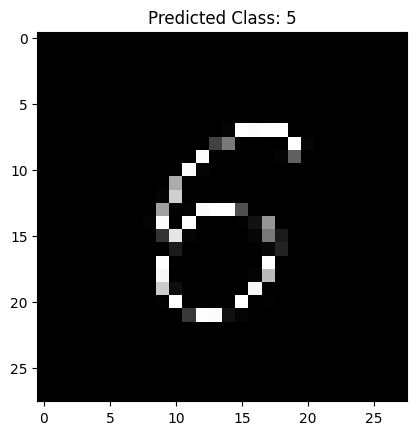

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
trainImages, testImages = trainImages / 255.0, testImages / 255.0

# Define the CNN model
cnnModel = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)
])

# Compile the model
cnnModel.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

# Train the model
cnnModel.fit(trainImages, trainLabels, epochs=5)

# Load and preprocess the handwritten image
handwrittenImagePath = "/content/gdrive/MyDrive/Colab Notebooks/handwritten6.jpg"
handwrittenImg = image.load_img(handwrittenImagePath, target_size=(28, 28), color_mode="grayscale")
handwrittenImgArray = image.img_to_array(handwrittenImg)
handwrittenImgArray = tf.expand_dims(handwrittenImgArray, 0)
handwrittenImgArray /= 255.0

# Augment the image
dataGenerator = ImageDataGenerator(rotation_range=30)
augmentedHandwrittenImg = dataGenerator.flow(handwrittenImgArray)

# Predict the class of the augmented image
predictions = cnnModel.predict(augmentedHandwrittenImg)
predictedClass = tf.argmax(predictions[0]).numpy()

# Display the result
plt.imshow(handwrittenImg, cmap='gray')
plt.title(f"Predicted Class: {predictedClass}")
plt.show()
